# **Aim**: Proof that weight distributions in the critical regime are normal distributions

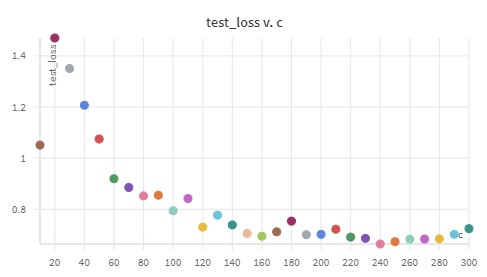

Research on first two models

In [40]:
import wandb
import torch
import matplotlib.pyplot as plt
import numpy as np
from const import PATH_CHECKPOINTS_DIR
import os

# Load weights from checkpoints

In [41]:
def get_list_of_weights(weights) :
    list_of_weights = []
    for key, value in weights.items():
        if key.endswith('weight') :
            list_of_weights.append((key, value))
    return list_of_weights

In [42]:
three_solutions = {}
file_paths = os.listdir(PATH_CHECKPOINTS_DIR)

for i, path in enumerate(file_paths):
    checkpoint = torch.load(os.path.join(PATH_CHECKPOINTS_DIR, path), map_location=torch.device('cpu'))
    model_weights = checkpoint['state_dict']
    list_of_weights = get_list_of_weights(model_weights)
    all_weights = np.concatenate([w[1].numpy().flatten() for w in list_of_weights])
    three_solutions[i] = all_weights

# Histograms

In [43]:
from scipy.stats import norm

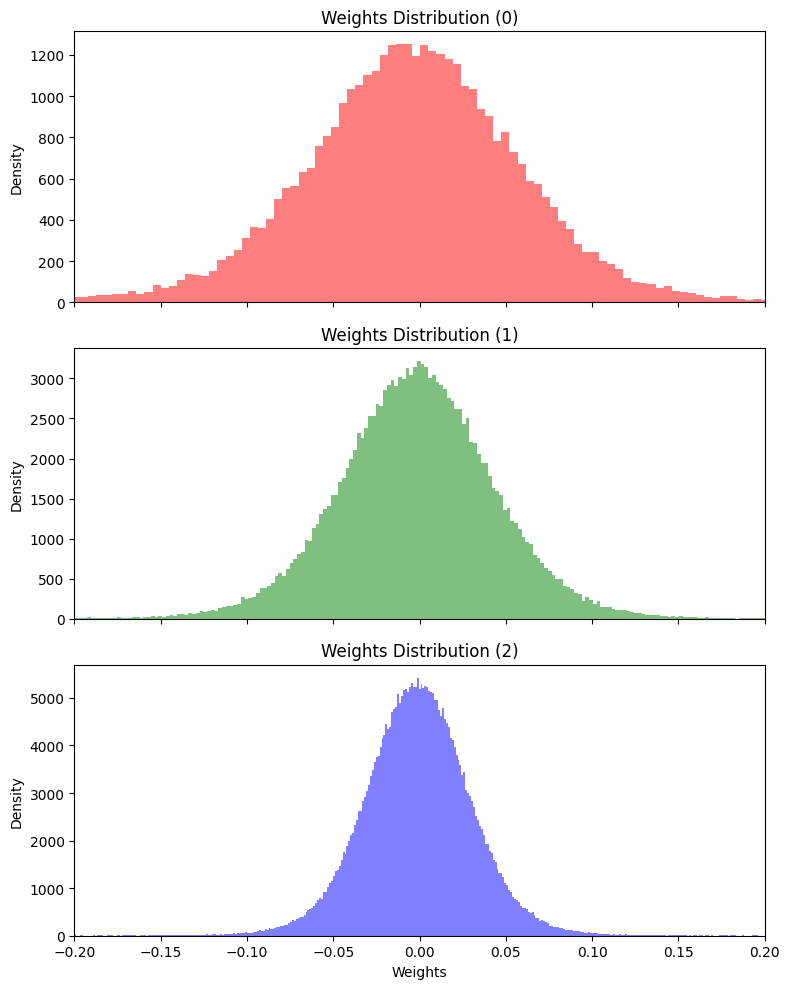

In [44]:
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(len(three_solutions), 1, figsize=(8, 10), sharex=True)
for i, (key, value) in enumerate(three_solutions.items()):
    ax = axes[i]
    ax.hist(value, bins='auto', alpha=0.5, label=key, color=colors[i])
    ax.set_ylabel('Density')
    ax.set_title(f'Weights Distribution ({key})')
    ax.set_xlim(-0.2, 0.2)

plt.xlabel('Weights')
plt.tight_layout()
plt.show()


## Weights distribution on different layers

In [45]:
three_solutions = {}
file_paths = os.listdir(PATH_CHECKPOINTS_DIR)

for i, path in enumerate(file_paths):
    checkpoint = torch.load(os.path.join(PATH_CHECKPOINTS_DIR, path), map_location=torch.device('cpu'))
    model_weights = checkpoint['state_dict']
    list_of_weights = get_list_of_weights(model_weights)
    three_solutions[i] = list_of_weights

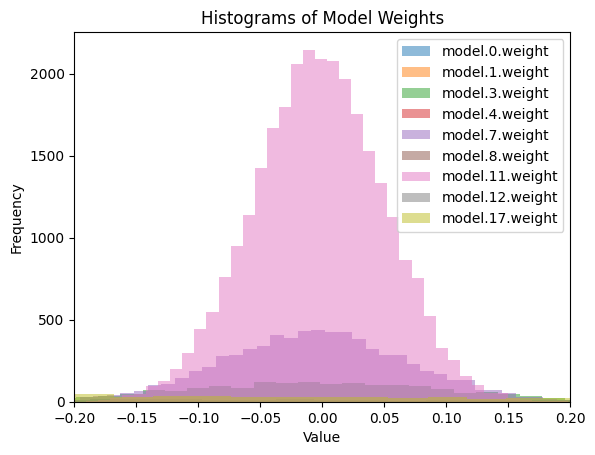

In [46]:
#Layer before interpolation threshold
for layer_name, tensors in three_solutions[0] :
    plt.hist(tensors.flatten().numpy(), bins=50, alpha=0.5, label=layer_name)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(-0.2, 0.2)
plt.title('Histograms of Model Weights')
plt.show()

In [47]:
def create_histograms(model,title) :
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))
    flatten_axs = axs.flatten()
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown']

    for i, (layer_name, tensors) in enumerate(model):
        flatten_axs[i].hist(tensors.flatten().numpy(), bins=50, alpha=0.5, label=layer_name, color=colors[i])
        flatten_axs[i].legend()
        flatten_axs[i].set_xlabel('Value')
        flatten_axs[i].set_ylabel('Frequency')
        flatten_axs[i].set_title('Histogram of {}'.format(layer_name))

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

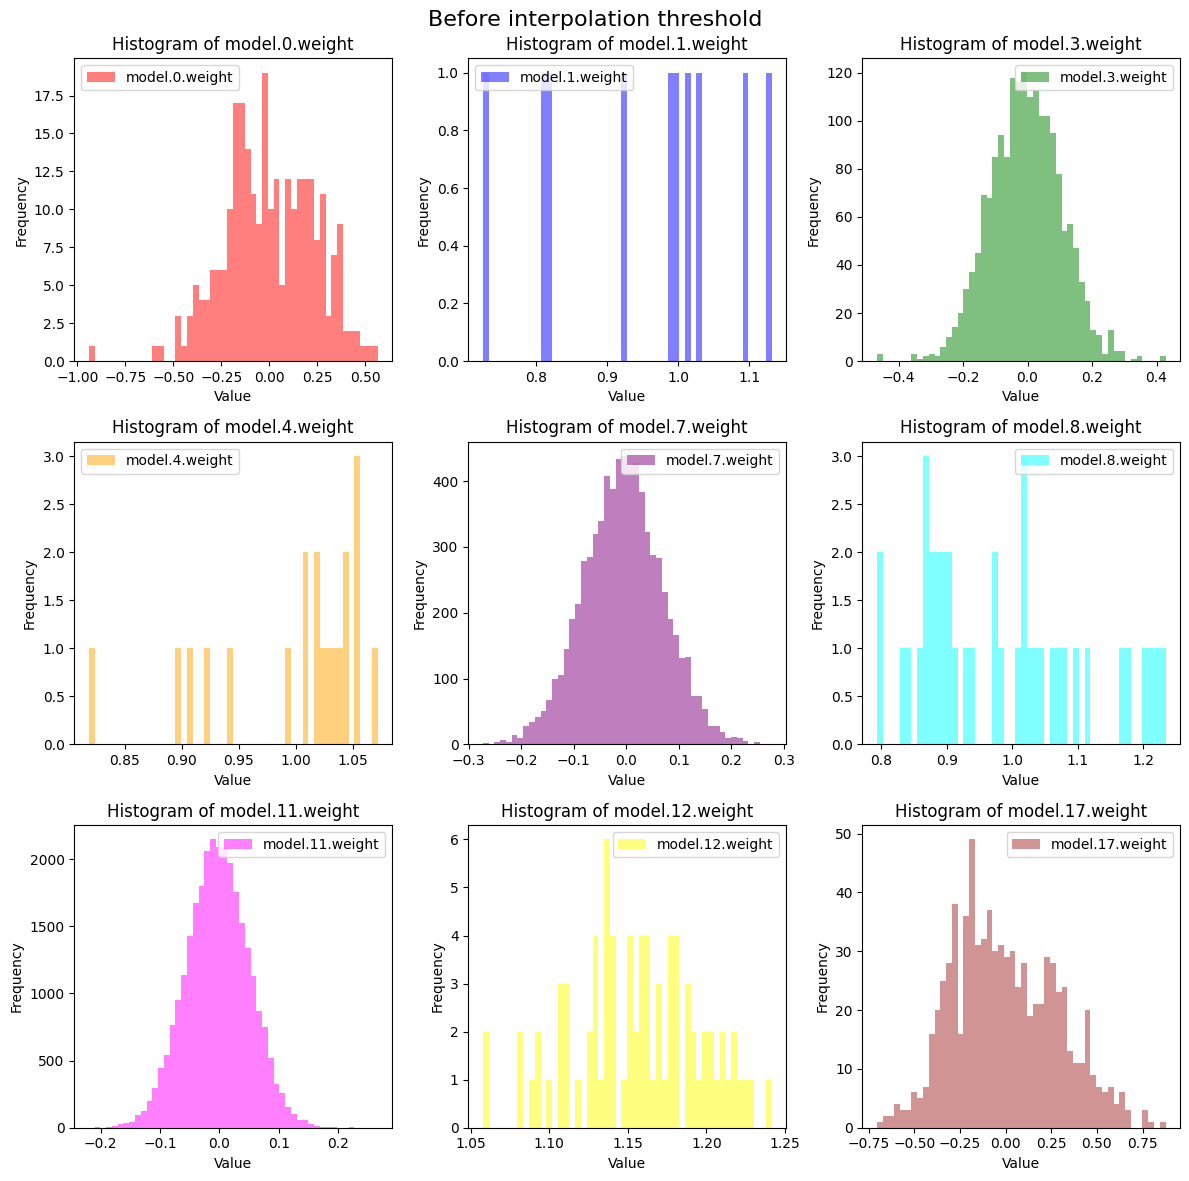

In [48]:
create_histograms(three_solutions[0], title = "Before interpolation threshold")

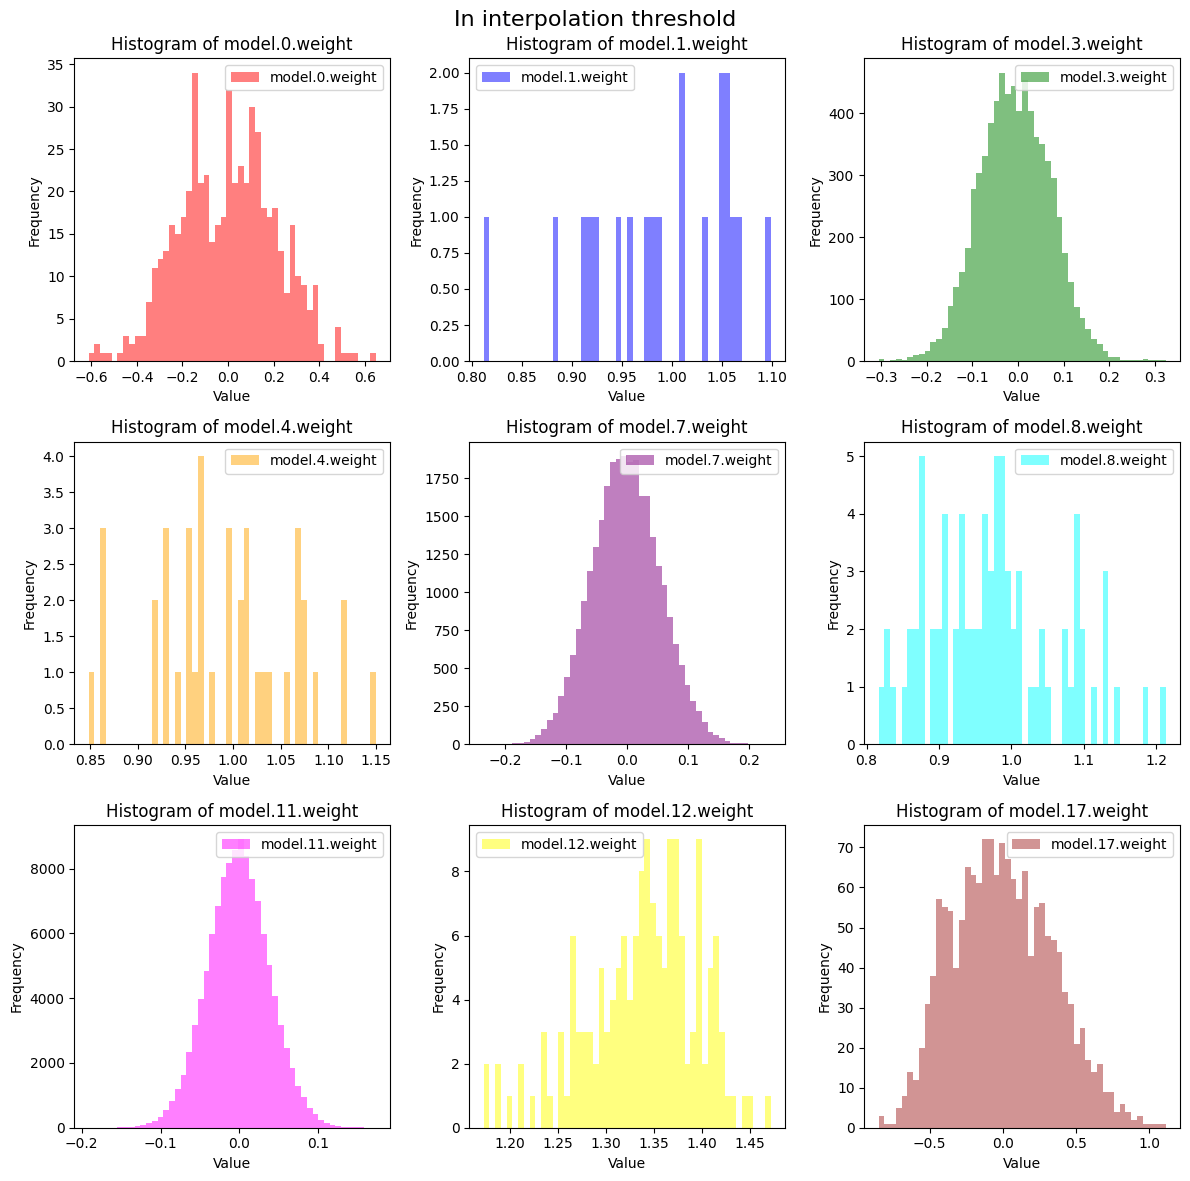

In [49]:
create_histograms(three_solutions[1], title = "In interpolation threshold")

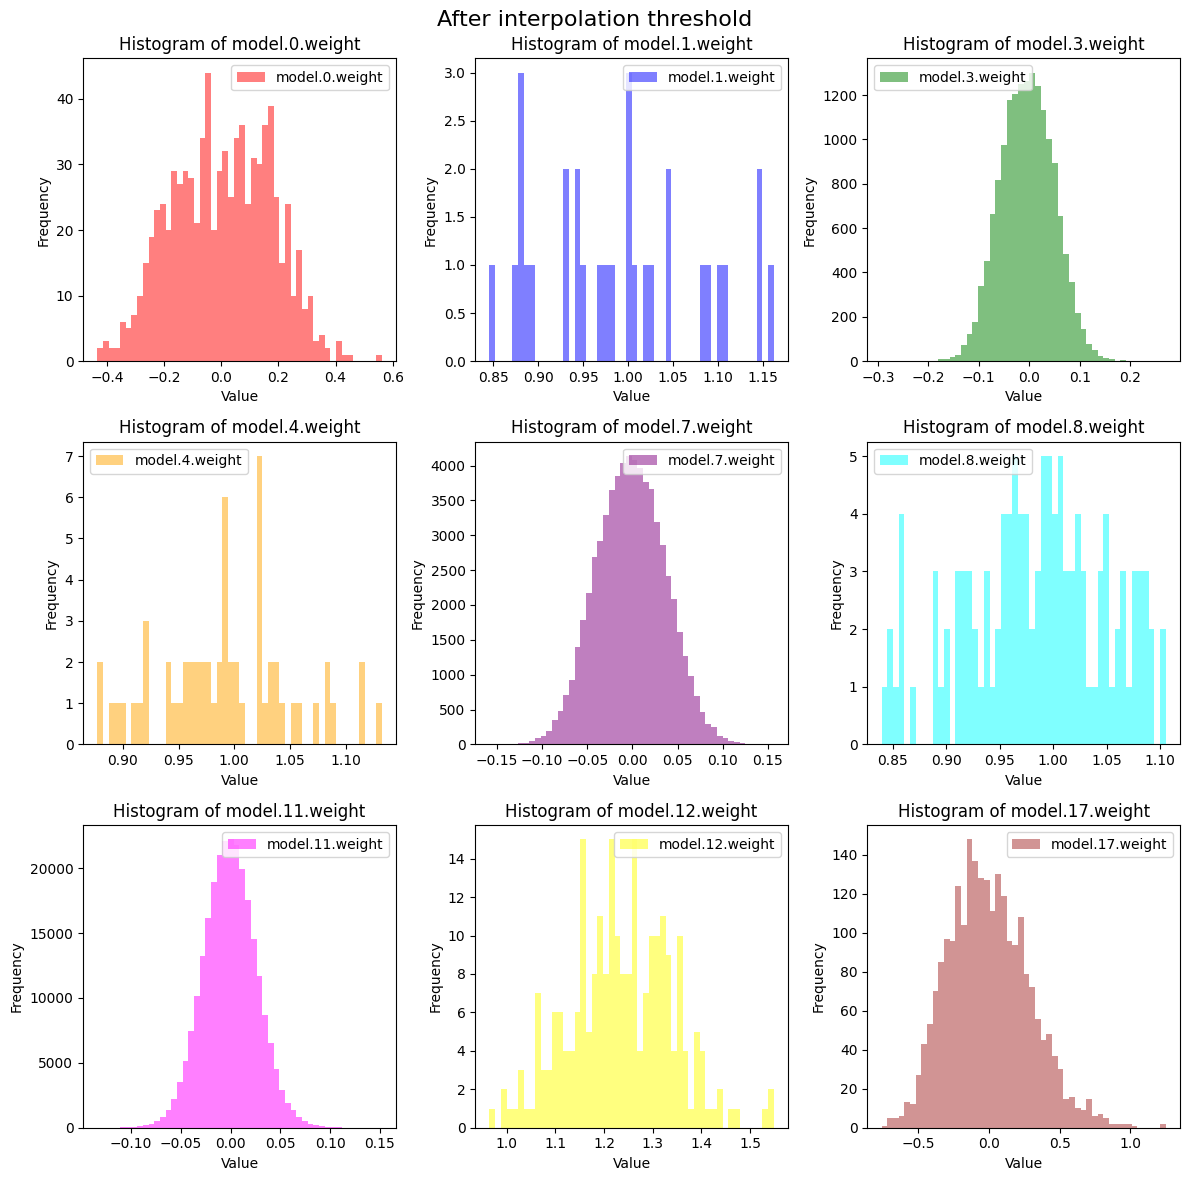

In [50]:
create_histograms(three_solutions[2], title = "After interpolation threshold")